In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [0, 1]

x0 = [0.1, 0.5, 0.9]
a0 = [1.5, 0.8, -1.0]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([0.1, 0.5, 0.9], [1.5, 0.8, -1.0], 1, 3)

In [4]:
# Define noise level
noise_level = 0.05

# Seed for noise
# Random.seed!(22)

0.05

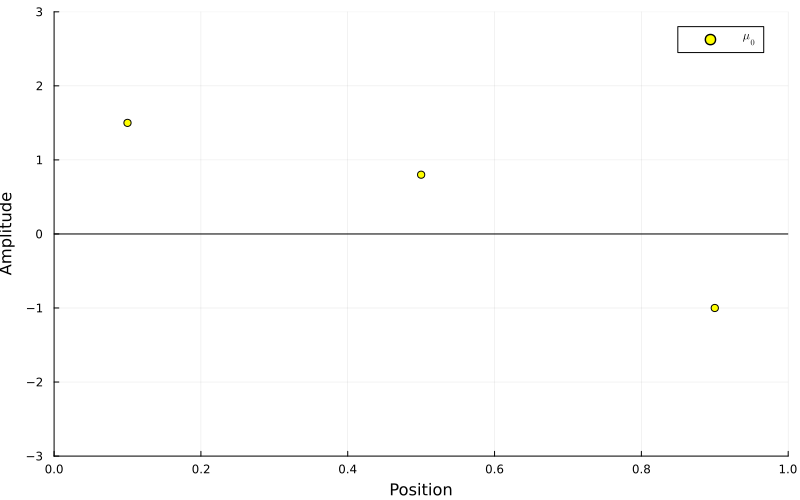

In [5]:
# Define the plot
num_points = 1000
plt_grid = range(domain..., length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = plot(xlims=extrema(domain), ylims=(-3, 3), xlabel="Position", ylabel="Amplitude", legend=:topright, size=plot_size)
hline!(plt, [0], linestyle=:solid, color=:black, label="")

plot_spikes!(plt, μ0, label=L"μ_0", color=:yellow)

In [23]:
ops = gaussian_operators_1D(.05, plt_grid)

Operators(var"#ϕ#184"{var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}(0.0:0.001:1.0, 399.99999999999994), 0.0:0.001:1.0), var"#Φ#185"{var"#ϕ#184"{var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}}(var"#ϕ#184"{var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}(0.0:0.001:1.0, 399.999999999999

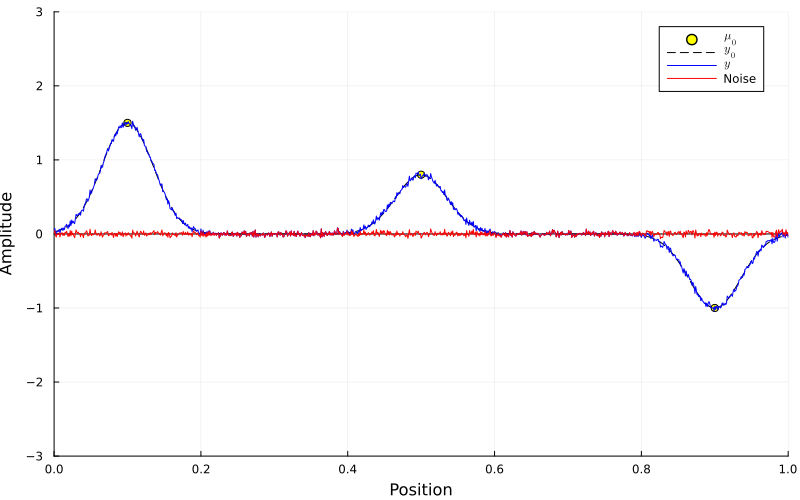

In [40]:
# Calculate the observation y0 = Φμ0
y0 = ops.Φ(x0, a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

plot!(plt_obs, plt_grid, y0, label=L"y_0", color=:black, linestyle=:dash)
plot!(plt_obs, plt_grid, y, label=L"y", color=:blue)
plot!(plt_obs, plt_grid, w, label="Noise", color=:red)


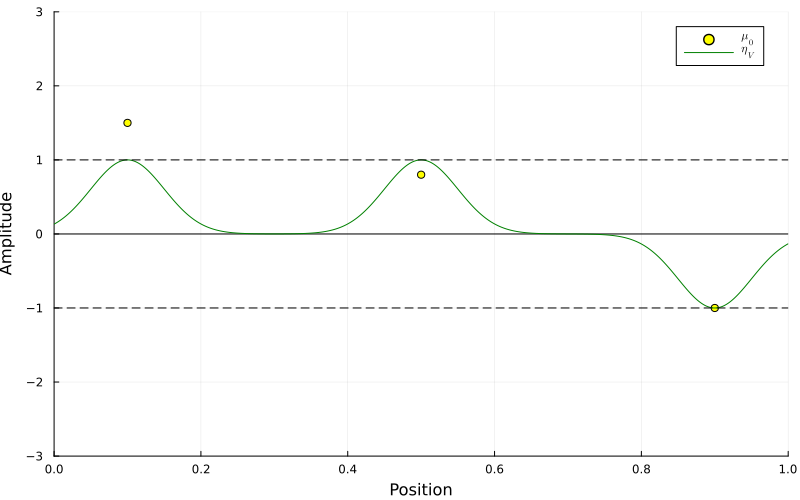

In [43]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

plot!(plt_cert, plt_grid, ηV, label=L"η_V", color=:green)
hline!(plt_cert, [1, -1], linestyle=:dash, color=:black, label="")

## Sliding Frank-Wolfe

In [44]:
# Define λ the regularisation parameter
λ = 1

prob_sfw = BLASSO(y, ops, domain, λ)

solve!(prob_sfw, :SFW)

BLASSO([0.03570998057097366, 0.07594326455500078, 0.010420606048322453, -0.006433016366258877, 0.03992450286283431, 0.0345253044020354, 0.035614572383924126, 0.06310356875618045, 0.009659846221475261, 0.06049485296730839  …  0.0007109261124284838, 0.03008202607341212, -0.04141963715977445, -0.011094381205855899, -0.011572710403335764, -0.055698660974200266, 0.0343666115204326, -0.01921223012499297, 0.000609588782090581, -0.046311923437951485], Operators(var"#ϕ#184"{var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}}(var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}(0.0:0.001:1.0, 399.99999999999994), 0.0:0.001:1.0), var"#Φ#185"{var"#ϕ#184"{var"#gauss1D#183"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Float64}, StepRangeLe

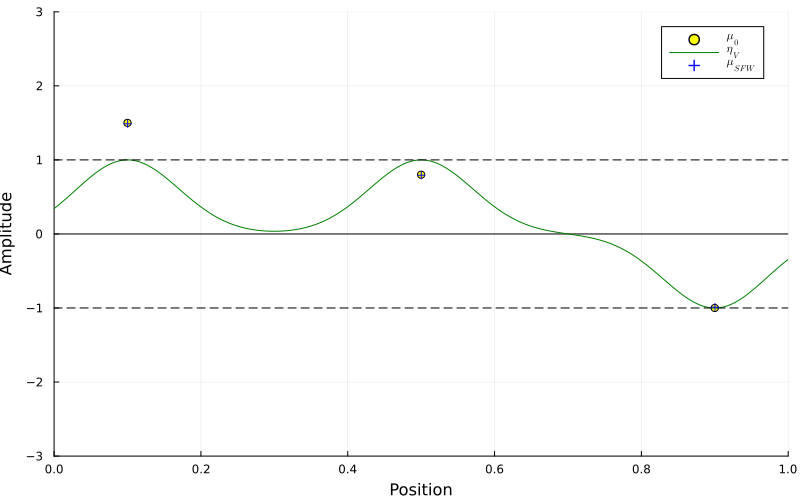

In [10]:
plt_sfw = deepcopy(plt_cert)

plot_spikes!(plt_sfw, prob_sfw.μ, label=L"μ_{SFW}", color=:blue, marker=:cross)
